In [1]:
from RKF45 import RKF45
import numpy as np
import matplotlib.pyplot as plt

n = 3/2  3.653694 2.714055
n = 3    6.896828 2.018236


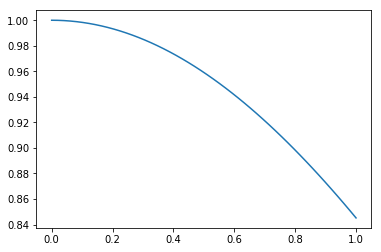

In [2]:
def LaneEmden(t, x, n=1.5):
    return np.array([ x[1], - np.power(x[0], n) - (2 * x[1] / t) ])


t0, x0 = 1e-10, np.array([1., 0.], dtype=np.complex64)
stop   = lambda t, x, n=1.5: np.real(x[0]) < 0.0

tf, x  = RKF45(LaneEmden, x0, stop, fkwargs=dict(n=1.5), ti=t0, tol=1e-6)
print( 'n = 3/2 ', round(tf, 6), round(tf**2 * np.abs(x[0].derivative()(tf)), 6) )

tf, x  = RKF45(LaneEmden, x0, stop, fkwargs=dict(n=3), ti=t0, tol=1e-6)
print( 'n = 3   ', round(tf, 6), round(tf**2 * np.abs(x[0].derivative()(tf)), 6) )

tf, x  = RKF45(LaneEmden, x0, 1, fkwargs=dict(n=1.5), ti=t0)
t = np.linspace(t0, tf)
plt.plot(t, x[0](t))
plt.show()

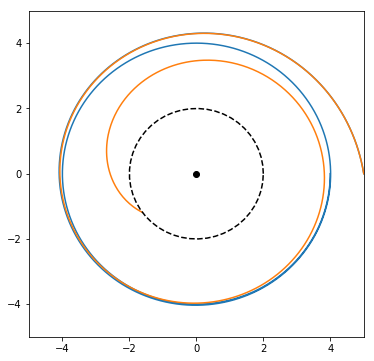

In [4]:
def SchwarzschildBH(t, x, M=1., l=0.1, e=1.):
    r, phi, tau = x
    dr = -np.sqrt( e**2 - (1 - (2 * M / r)) * (1 + (l / r)**2) )
    dphi = l / r**2
    dtau = e**2 / (1 - (2 * M / r))
    return np.array([dr, dphi, dtau], dtype=np.complex64)


def stop(t, x, M=1., l=5., e=1.):
    return (np.real(x[0]) <= 2 * M) or (np.abs(x[1]) > 4 * np.pi) or (t > 200)


x0 = np.array([5., 0., 0.], dtype=np.complex64)

tf, x  = RKF45(SchwarzschildBH, x0, stop, fkwargs=dict(M=1., l=3.999, e=1.))
t = np.linspace(0, tf, 1000)
r1, phi1 = x[0](t), x[1](t)

tf, x  = RKF45(SchwarzschildBH, x0, stop, fkwargs=dict(M=1., l=4.0, e=1.))
t = np.linspace(0, tf, 1000)
r2, phi2 = x[0](t), x[1](t)

plt.figure( figsize=(6, 6) )
plt.plot( r2 * np.cos(phi2), r2 * np.sin(phi2) )
plt.plot( r1 * np.cos(phi1), r1 * np.sin(phi1) )
plt.plot( 2 * np.cos(np.linspace(0, 2 * np.pi)), 2 * np.sin(np.linspace(0, 2 * np.pi)), 'k--')
plt.plot( 0, 0, 'ko' )
plt.xlim([ -5, 5 ])
plt.ylim([ -5, 5 ])
plt.show()